In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.model_selection import train_test_split




path = "/nfs/dust/belle2/user/axelheim/MC_studies/my6modes/"
root_path = path + "rootfiles/noSim_noReco/"
#file_pi = uproot.open((root_path + "pi_nTuples_mode0.root"))

#file_raw = uproot.open(root_path + "mode0_17_events.root")

In [4]:
def conditions(s):
    label = -1
    if (int(s['genMotherPDG0']) == Bs_pdg) or (int(s['genMotherPDG1']) == Bs_pdg) or (int(s['genMotherPDG2']) == Bs_pdg) or (int(s['genMotherPDG3']) == Bs_pdg):
        label = 1
    elif (int(s['genMotherPDG0']) == Hc_pdg) or (int(s['genMotherPDG1']) == Hc_pdg) or (int(s['genMotherPDG2']) == Hc_pdg) or (int(s['genMotherPDG3']) == Hc_pdg):    
        label = 2
    else:
        label = 0
    
    return label

In [5]:
file = uproot.open("merged_DXtagDstl_MC14ri_a.root:variables")

In [6]:
file.keys()

['__experiment__',
 '__run__',
 '__event__',
 '__candidate__',
 '__ncandidates__',
 '__weight__',
 'm2RecoilSignalSide',
 'foxWolframR2_maskedNaN',
 'foxWolframR2',
 'extraInfo__boFEIProbabilityRank__bc',
 'nTracks',
 'BeamE',
 'BeamPx',
 'BeamPy',
 'BeamPz',
 'BeamcmsE',
 'BeamcmsPx',
 'BeamcmsPy',
 'BeamcmsPz',
 'genUp4S_PDG_0',
 'genUp4S_charge_0',
 'genUp4S_mdstIndex_0',
 'genUp4S_genParticleID_0',
 'genUp4S_E_0',
 'genUp4S_Px_0',
 'genUp4S_Py_0',
 'genUp4S_Pz_0',
 'genUp4S_P_0',
 'genUp4S_cmE_0',
 'genUp4S_cmPx_0',
 'genUp4S_cmPy_0',
 'genUp4S_cmPz_0',
 'genUp4S_cmP_0',
 'genUp4S_PDG_0_0',
 'genUp4S_mdstIndex_0_0',
 'genUp4S_genParticleID_0_0',
 'genUp4S_PDG_0_0_0',
 'genUp4S_mdstIndex_0_0_0',
 'genUp4S_genParticleID_0_0_0',
 'genUp4S_PDG_0_0_1',
 'genUp4S_mdstIndex_0_0_1',
 'genUp4S_genParticleID_0_0_1',
 'genUp4S_PDG_0_1',
 'genUp4S_mdstIndex_0_1',
 'genUp4S_genParticleID_0_1',
 'genUp4S_PDG_0_2',
 'genUp4S_mdstIndex_0_2',
 'genUp4S_genParticleID_0_2',
 'genUp4S_PDG_1',
 'genUp4

In [7]:
df = file.arrays(library="pd")

In [8]:
df.to_csv("/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/recreateGiannasPlot/DXtagDstl_df.csv")

### this step is necessary because the uproot works only with my conda environment but on my localhost jupyterhub server the plots make the kernel die

In [2]:
df = pd.read_csv("/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/recreateGiannasPlot/DXtagDstl_df.csv")

[Text(0.5, 1.0, 'Unaltered m2RecoilSignalSide')]

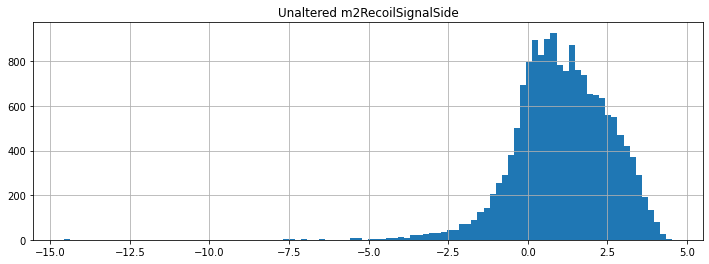

In [3]:
hist = df.hist("m2RecoilSignalSide", bins=100, figsize=(12,4))
#hist = df.hist('correct', bins=100, by='K', figsize=(12,4))

#xlim = (0, 1.0)
#ylim = (0, 1200)
#xlabel="percentage of correctly particles per event"
#ylabel="events"

title="Unaltered m2RecoilSignalSide"

# Setting the values for all axes.
#plt.setp(hist, xlim=xlim, xlabel=xlabel, ylabel=ylabel, title=title)
plt.setp(hist, title=title)

#plt.savefig('plots_40.3/percentage_corPred_particles_per_Event_all_BsXHc.pdf')

In [4]:
cut_df = df
print(cut_df.shape[0])
cut_df = cut_df[cut_df.dau0_Mbc > 5.26] # cut on B_tag M_bc
print(cut_df.shape[0])
cut_df = cut_df[(cut_df.dau0_deltaE < 0.2) & (cut_df.dau0_deltaE > -0.2)] # cut on B_tag deltaE
print(cut_df.shape[0])
cut_df = cut_df[cut_df.dau0_dau0_sigProb > 0.001] # cut on H_c sigProb
print(cut_df.shape[0])
cut_df = cut_df[cut_df.foxWolframR2 < 0.3] # cut on event
print(cut_df.shape[0])
cut_df = cut_df[(cut_df.Dst_pt < 2.4) & (cut_df.lep_pt > 1.0)] # cut on l and D* pt

16482
2001
2001
2001
1884


In [28]:
print("rows:",cut_df.shape[0])
print("colums:",cut_df.shape[1])



rows: 1558
colums: 246


In [24]:
cut_df

,Unnamed: 0,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,m2RecoilSignalSide,foxWolframR2_maskedNaN,foxWolframR2,...,Dst_cmpy,Dst_cmpz,Dst_cmpt,Dst_mccmE,Dst_mccmp,Dst_mccmpx,Dst_mccmpy,Dst_mccmpz,Dst_DeltaM,Dst_isSignal
10,10,1003,0,2458124,0,1,1.0,0.673459,0.234991,0.234991,...,-0.425754,0.523998,0.931081,11.003155,3.028028,0.456500,-0.000000,2.993420,0.142930,0.0
11,11,1003,0,2458225,0,1,1.0,0.227446,0.188024,0.188024,...,-0.724654,-0.874231,0.913730,2.197086,0.886710,-0.458667,-0.723845,-0.227877,0.146977,0.0
22,22,1003,0,2459817,0,1,1.0,0.695042,0.298878,0.298878,...,0.414063,-1.080745,0.415100,11.006012,3.038425,0.456618,-0.000000,3.003919,0.149403,0.0
23,23,1003,0,2459976,0,1,1.0,0.247660,0.064750,0.064750,...,0.492922,-0.069597,0.666662,11.011558,3.033203,0.456849,-0.000000,2.998601,0.159096,0.0
31,31,1003,0,2461040,0,1,1.0,0.699016,0.094285,0.094285,...,1.407819,0.977486,1.448759,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.148811,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16415,16415,1003,0,14975694,0,1,1.0,0.543021,0.139989,0.139989,...,0.992058,0.079094,1.338883,11.004216,3.031189,0.456544,-0.000000,2.996611,0.146024,0.0
16416,16416,1003,0,14975910,0,1,1.0,0.002803,0.137401,0.137401,...,1.436514,0.383800,2.148525,3.118180,2.383257,-1.462906,1.438392,1.212787,0.145533,1.0
16432,16432,1003,0,5625952,0,1,1.0,0.436672,0.178839,0.178839,...,-0.861694,-0.204828,1.117565,11.006581,3.041359,0.456642,-0.000000,3.006882,0.144655,0.0
16440,16440,1003,0,5627362,0,1,1.0,0.090022,0.107605,0.107605,...,0.355127,-1.274439,0.371279,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.148442,0.0


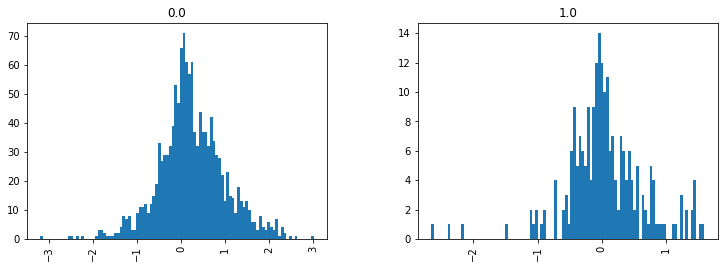

In [27]:
hist = cut_df.hist("m2RecoilSignalSide", bins=100, figsize=(12,4), by="dau0_dau0_isSignal")
